# Importing necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Data Understanding

# Importing the our data from weatherAUS.csv file

In [2]:
dataset = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\weatherAUS.csv")
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Here, we can see **23 columns** and **5 rows** altogether. Independent variables are 22 and depedent variable is 1 i.e. **Rain Tomorrow** column which is in terms of yes (means it will rain tomorrow) and no (doesn't rain tomorrow).

The location repersents the differnt places of Australia where the date is in increasing order as we need the data of same place for many time in order to predict the rain in that place. There are other factors as well like **minTemp** = minimum temperature **maxTemp** = maximum temperature, **rain tomorrow**, and **pressure**, **humidity** ,**sunshine**, **Evaporation**, **WindGustSpeed**, **WindGustDirection** **temperature** and **cloud** of same place and same day at different times that affects the rain tomorrow.

In [3]:
dataset.shape

(145460, 23)

There are altogether **145460 rows** and **23 columns** in our dataset.

# Data Analysis

# Check for null Values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are alotether 2 datatypes in our dataset i.e. **float64** and **object**

**Date** and **location** has no null values at all

**Sunshine, Evaporation, Cloud9am and Cloud3am** have many null-values dropped during data cleaning

other columns also have some null values in them which can be removed during data cleaning

# Count of null values

In [5]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

We can see the count of null values present in our dataset indpendent variables

# Target Column

In [6]:
# checking target column values counts
dataset['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

There are altogether **110316** No and **31877** Yes in our target column i.e **rain tomorrow**

Text(0.5, 1.0, 'Target Count')

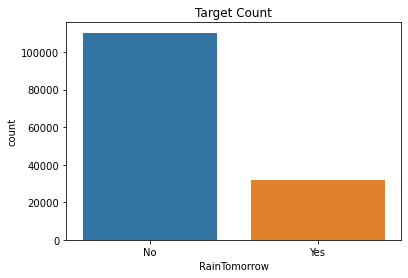

In [7]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot('RainTomorrow',data=dataset)
plt.title("Target Count")

Bar graph of our target variable

# Five number summary 

In [8]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


only those features which had **float64** data type in them are shown here.

we can see the **mean**, **minimum value (min)**, **maximum value (max)**, **Quartile 1 (25%)**, **median (50%)**, **Quartile 3 (75%)** of our independet variables.

These values are the values of Australia for example the minimum temperature in australia in -8.5 C and maximum temprature is 33.9 C on a particular day

# Data Cleaning

In [9]:
categorical = [ i for i in dataset.columns if dataset[i].dtype =='O']
floatdata = [i for i in dataset.columns if dataset[i].dtype !='O']
print('Categorical data types columns:',categorical)
print('\n\nFloat data types columns:',floatdata)

Categorical data types columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Float data types columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


We have categorized our data into string and float

In [10]:
df = dataset.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)  # store the date in df
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


We have dropped the coluns which are not necessary and had many null values in them.

We need to change the string data present in our independent feartures as well

In [11]:
df = df.dropna(axis = 0)
df.shape

(112925, 17)

We dropped the rows that had the null values in them so we can see the rows are now reduced from **145460** to **112925** and columns are reduced from **23** to **17**

In [12]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

We can see which columns we have in our dataset now

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

We just converted the string data set to numeric using label encoding as we know that string dataset cannot be fed to our model.

We have assigned the values to the respective columns

In [14]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


As we can see that the string data has been converted to numeric datatype so we can train our model now.

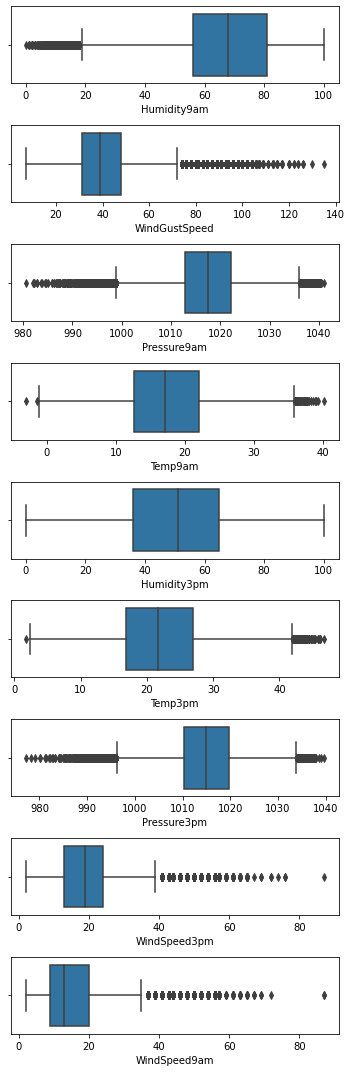

In [15]:
fig, axs = plt.subplots(9, figsize = (5,15))
plt1 = sns.boxplot(df['Humidity9am'], ax = axs[0])
plt2 = sns.boxplot(df['WindGustSpeed'], ax = axs[1])
plt3 = sns.boxplot(df['Pressure9am'], ax = axs[2])
plt4 = sns.boxplot(df['Temp9am'], ax = axs[3])
plt5 = sns.boxplot(df['Humidity3pm'], ax = axs[4])
plt6 = sns.boxplot(df['Temp3pm'], ax = axs[5])
plt8 = sns.boxplot(df['Pressure3pm'], ax = axs[6])
plt9 = sns.boxplot(df['WindSpeed3pm'], ax = axs[7])
plt10 = sns.boxplot(df['WindSpeed9am'], ax = axs[8])

plt.tight_layout()

Our data set has so many outliers so we remove it so that our model can perform better.

**IQR = Q3 - Q1**

**Lower Boundary = Q1 - 1.5 * IQR**

**Upper Boundary = Q3 + 1.5 * IQR**

# Removing outliers

**Since windspeed9am has so many outliers if we remove the outliers of that columns other columns outliers will also significantly reduce**


In [16]:
Q1 = df.WindSpeed9am.quantile(0.25)
Q3 = df.WindSpeed9am.quantile(0.75)

IQR = Q3-Q1

upper_limit = Q3+1.5*IQR

dfe = df[(df.WindSpeed9am<upper_limit)]

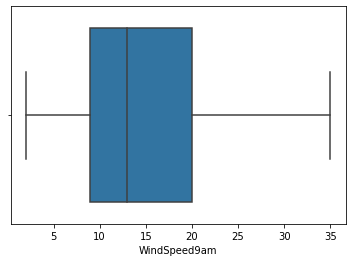

In [17]:
sns.boxplot(dfe['WindSpeed9am'])
plt.show()

In [18]:
dfe.shape

(110936, 17)

**pressure 3 pm has so many outliers in the bottom part so we can remove it as well**

In [19]:
Q1 = df.Pressure9am.quantile(0.25)
Q3 = df.Pressure9am.quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR



dframe = dfe[(dfe.Pressure9am>lower_limit)&(dfe.Pressure9am<upper_limit)]


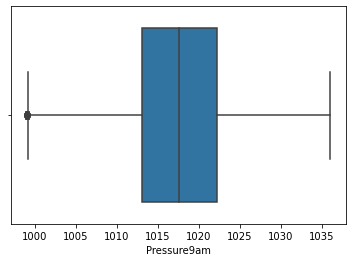

In [20]:
sns.boxplot(dframe['Pressure9am'])
plt.show()

In [21]:
dframe.shape

(109807, 17)

In [22]:
Q1 = df.WindGustSpeed.quantile(0.25)
Q3 = df.WindGustSpeed.quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR



dframes = dframe[(dframe.WindGustSpeed>lower_limit)&(dframe.WindGustSpeed<upper_limit)]

In [23]:
dframes.shape

(108114, 17)

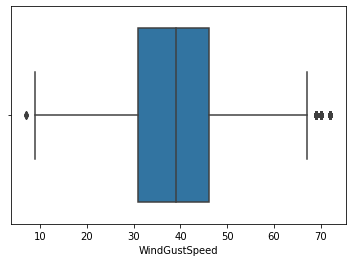

In [24]:
sns.boxplot(dframes['WindGustSpeed'])
plt.show()

# Divide into Dependent(y) and Indpendent(x)

In [25]:
x = dframes.drop(['RainTomorrow'], axis = 1)
y = dframes['RainTomorrow']



# printing the x and y data

In [26]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

# min temp vs max temp 

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

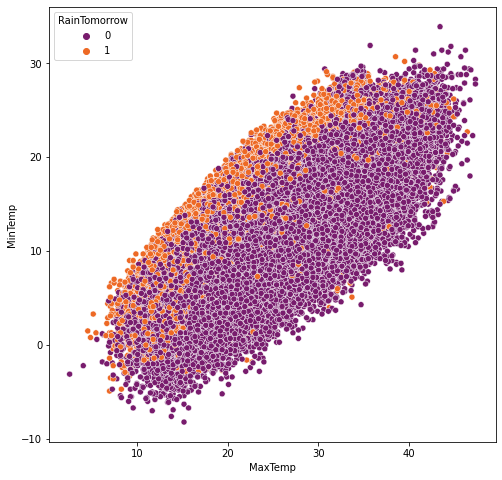

In [28]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = dframe)

Linear relationship is seen between minimum temperature and maximum temperature means increase in max temp means min temp will aslo increase

orange dots means it will rain tomorrow and purple mean no rain

chance of rain is increasing with increase in temperature

# HeatMap to understand the correlation between our features

<AxesSubplot:>

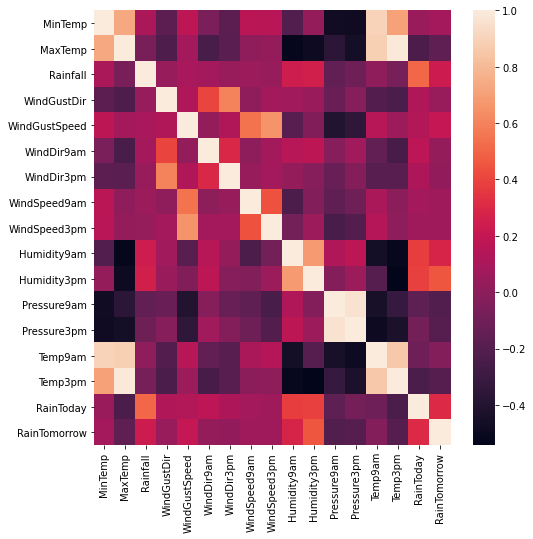

In [29]:
plt.figure(figsize = (8,8))
sns.heatmap(dframes.corr())       # represent the correlation in heatmap

The **upper value (Color = light skin color)** means good **postive correlation** and **lower most value (Color= black)** mean **negative correlation**


From here we can see the **humidity3pm** has the highest positive correlation with **rain tomorrow** and **Pressure9am** has the most negative correlation with **rain tomorrow**

In [30]:
correlation = dframe.corr()
print(correlation['RainTomorrow'].sort_values(ascending=False),'\n')

RainTomorrow     1.000000
Humidity3pm      0.452116
RainToday        0.307634
Humidity9am      0.275576
Rainfall         0.235425
WindGustSpeed    0.223420
MinTemp          0.081015
WindSpeed3pm     0.079176
WindSpeed9am     0.070827
WindGustDir      0.047817
WindDir9am       0.030375
WindDir3pm       0.021947
Temp9am         -0.031207
MaxTemp         -0.162021
Temp3pm         -0.195762
Pressure3pm     -0.206704
Pressure9am     -0.226230
Name: RainTomorrow, dtype: float64 



**As said earlier by the heat map we can see that humidity3pm and pressure9am are correct**

# Split the dataset in train set and test set

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)    # test size is kept at 30%

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score   # importing for matrix purpose

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression         # import logistic regression
lr = LogisticRegression()                                   # creating object
lr.fit(x_train,y_train)                                     # fitting our dataset
predictions = lr.predict(x_test)                            # predicting the values for x_test 
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))                # printing out the confusion matrix
print("\n\nClassificatoin Report: ")
print(classification_report(y_test, predictions))           # print out the report
print("\n\nAccuracy:")
print(accuracy_score(y_test, predictions))                  # print out the accuracy_score

Confusion Matrix: 
[[16191   844]
 [ 2518  2070]]


Classificatoin Report: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17035
           1       0.71      0.45      0.55      4588

    accuracy                           0.84     21623
   macro avg       0.79      0.70      0.73     21623
weighted avg       0.83      0.84      0.83     21623



Accuracy:
0.8445174120149841


**Confusion Matrix**

It is technique for summarizing our classification model performance.

**True Positive** (Top left of our confusion matrix)
 
our model has correctly predicted **16175** results that it will rain tomorrow

**True Negative** (Bottom right of our confusion matrix)

our model has correctly predicted **2154** results that it will not rain tomorrow

**False Positive** (Top right of our confusion matrix)
 
our model has  predicted **794** results that it will rain tomorrow but it doesn't rain according to our actual data

**False Negative** (Bottom left of our confusion matrix)

our model has predicted **2500** results that it will not rain tomorrow but it rains according to our actual data

**Precision** are derived from the confusion matrix and **recall** mean to call back the faulty predictions but might get non-faulty as well cause the goal of recall is to get all the faulty prediction back.

**F1score** is average of precision and recall.


**Accuracy = Correct Prediction / Total Prediction** 

We can see that our model has brought us an accuracy of **84%**

# AUC-ROC Curve (AUROC) 

# ROC (Receiver Operating Characterstics)

**ROC** summarizes the prediction of performance of classification model at all classification thereshold. Partcularly, the ROC Curve plots the **False Positive Rate (FPR)** on the **X-axis** and **True Positive Rate (TPR)** on the **Y-axis**


TP = True Positive, FP = False Positive, TN = True Negative, FN = False Negative


**TPR/Recall/Sensitivity  =  TP/(TP+FN)**


**FPR(1-Specifity)        = FP/(FP+TN)**

In [34]:

import sklearn.metrics as metrics

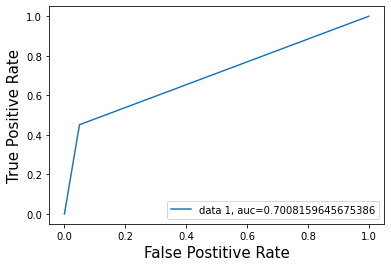

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)   # roc curve
auc = metrics.roc_auc_score(y_test, predictions)       # auc score
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Postitive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.show()

In [36]:
dframes.shape

(108114, 17)

From the roc auc curve we can see that our auc score is 0.721 which is pretty good as we have over 100 thousand data i.e. 108114. We know that larger the area under the curve better the module but our module is performing logistic regression on huge data the result is satisfactory. Higher the auc score the better the module predicts 0 as 0 and 1 as 1. So our model has a chance of 70% to predict correct.